In [1]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tkinter as tk
from tkinter import filedialog

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import SpectralClustering
from scipy.spatial.distance import pdist, squareform

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import nltk
import pymorphy3

from sklearn.metrics import silhouette_score
from sklearn.cluster import SpectralClustering, KMeans

D:/PROGRAMS/Educational/poorly_structured_data/poorly_structured_data/lab_4/2021_SPORT_v2025
Начало обработки файлов
Окончание обработки файлов
['трагический случайность париматч мхл стартовать один пара составить локо динамо второй матч серия динамовец проиграть серия потерять защитник тимур файзутдинов травма защитник выглядеть жутко мочь встать покинуть лёд носилки матч динамо опубликовать шокировать заявление тимур файзутдин начать сезон качество капитан молодёжный команда динамо свой год тим провести наш команда матч тот игрок кто один игра единый смена биться команда драться результат матч тимур игровой ситуация поймать шайба реанимация жизнь сражаться ярославский врач тот пора состояние игрок улучшиться находиться ярославль бороться жизнь точный диагноз предположительно шайба попасть сонный артерия комментарий официальный сообщество динамо оставить отец тимур травма файзутдинов роковой стечение обстоятельство вариант который мочь привести повреждение сонный артерия поскольку пов

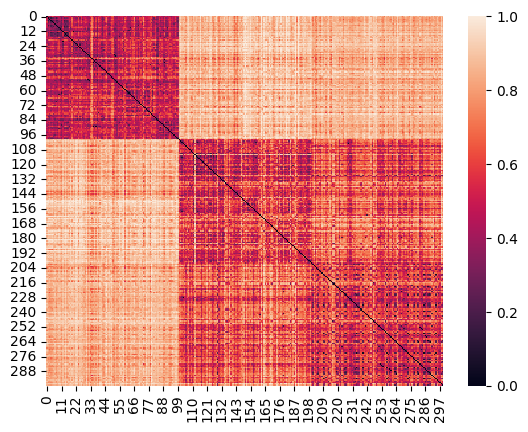

In [ ]:
def select_directory():
    root = tk.Tk()
    root.withdraw()
    directory = filedialog.askdirectory()
    print(directory)
    return directory


def list_all_files(directory):
    all_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            all_files.append(os.path.join(root, file))
    return all_files


def preprocess_text(text, morph, nltk_stopwords):
    text = text.lower()
    words = nltk.word_tokenize(text, language='russian')
    words = [word for word in words if word not in nltk_stopwords]
    words = [morph.parse(word)[0].normal_form for word in words]
    words = [word for word in words if word.isalpha()]
    return words


def load_and_process_documents(directory):
    documents = []
    all_files = list_all_files(directory)

    morph = pymorphy3.MorphAnalyzer()
    nltk_stopwords = nltk.corpus.stopwords.words('russian')

    print('Начало обработки файлов')
    for file in all_files:
        if file.endswith('.txt'):
            with open(file, 'r', encoding='utf-8') as f:
                text = f.read()
                processed_text = preprocess_text(text, morph, nltk_stopwords)
                documents.append(processed_text)
    print('Окончание обработки файлов')

    return documents

dir_path = select_directory()
documents = load_and_process_documents(dir_path)
corpus = [' '.join(doc) for doc in documents]
print(corpus)

# Векторизация
vectorizer = CountVectorizer(max_features=150)
X = vectorizer.fit_transform(corpus)

# Матрица растояний
dist_matrix = pdist(X.toarray(), metric='cosine')
dist_matrix = squareform(dist_matrix)
print(dist_matrix)
sns.heatmap(dist_matrix)
plt.show()

In [16]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
kmeans_silhouette_avg = silhouette_score(X, kmeans_labels, metric='cosine')
print(kmeans_labels) 
print(kmeans_silhouette_avg)

delta = 4.0
similarity_matrix = np.exp(- dist_matrix ** 2 / (2. * delta ** 2))
spectral = SpectralClustering(n_clusters=3, affinity='precomputed', random_state=0)
labels = spectral.fit_predict(similarity_matrix)
score = silhouette_score(X, labels, metric='cosine')
print(score)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 2
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 2 2 2 0 2 0 0 0 0 0 0 0 2 1 1 2 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 2 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 2 2 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 2 0 0 0 2 0 0 0 2 2 0 0 0 2 0
 0 0 0 0]
-0.11107505458549395
0.2518557667870345


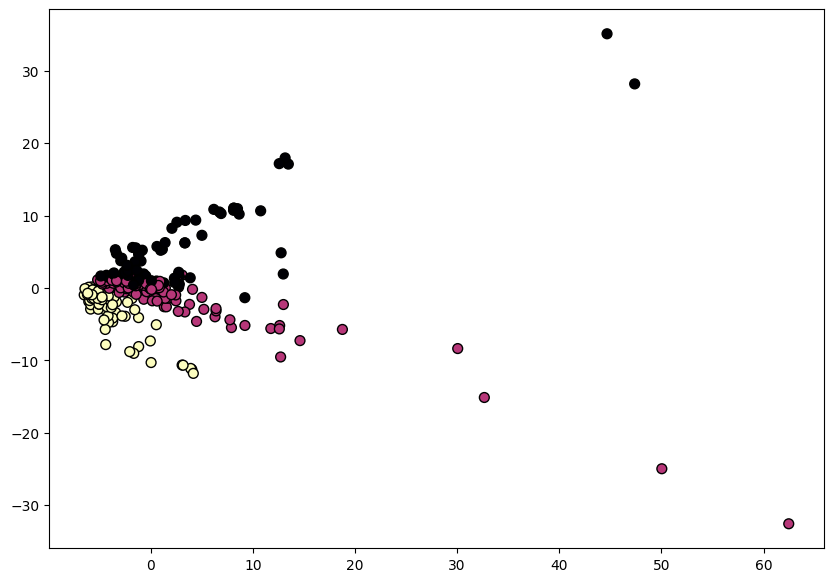

In [17]:
from sklearn.decomposition import PCA

unique_clusters = len(set(labels))
pca = PCA(n_components=unique_clusters)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='magma', marker='o', edgecolor='k', s=50)
plt.show()

<Figure size 640x480 with 0 Axes>

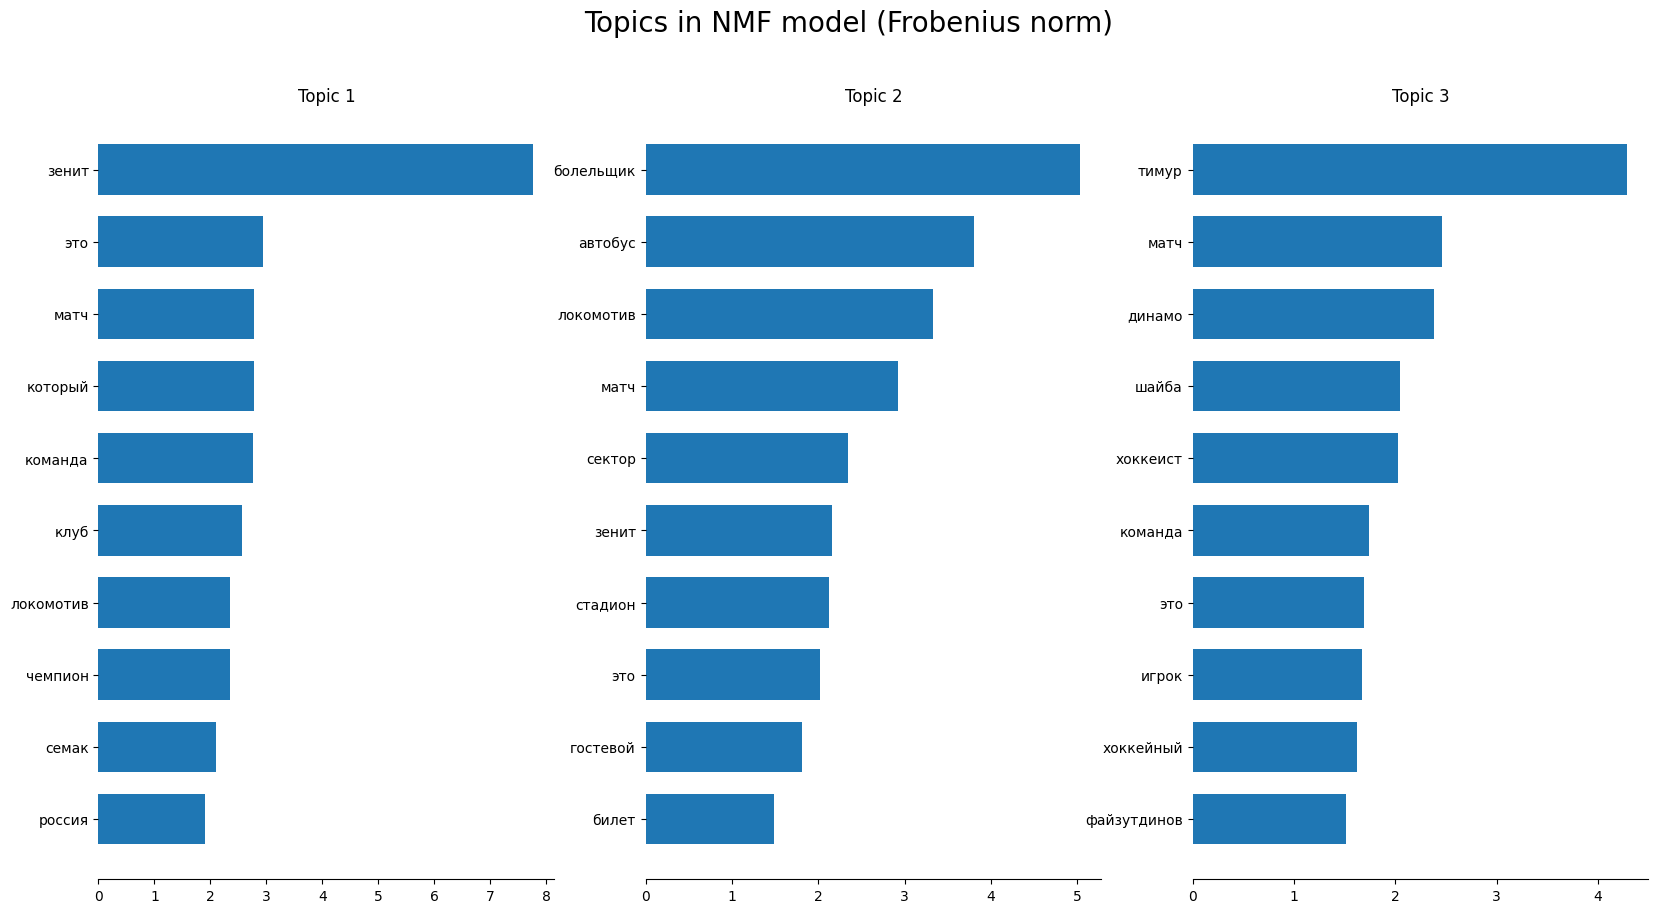

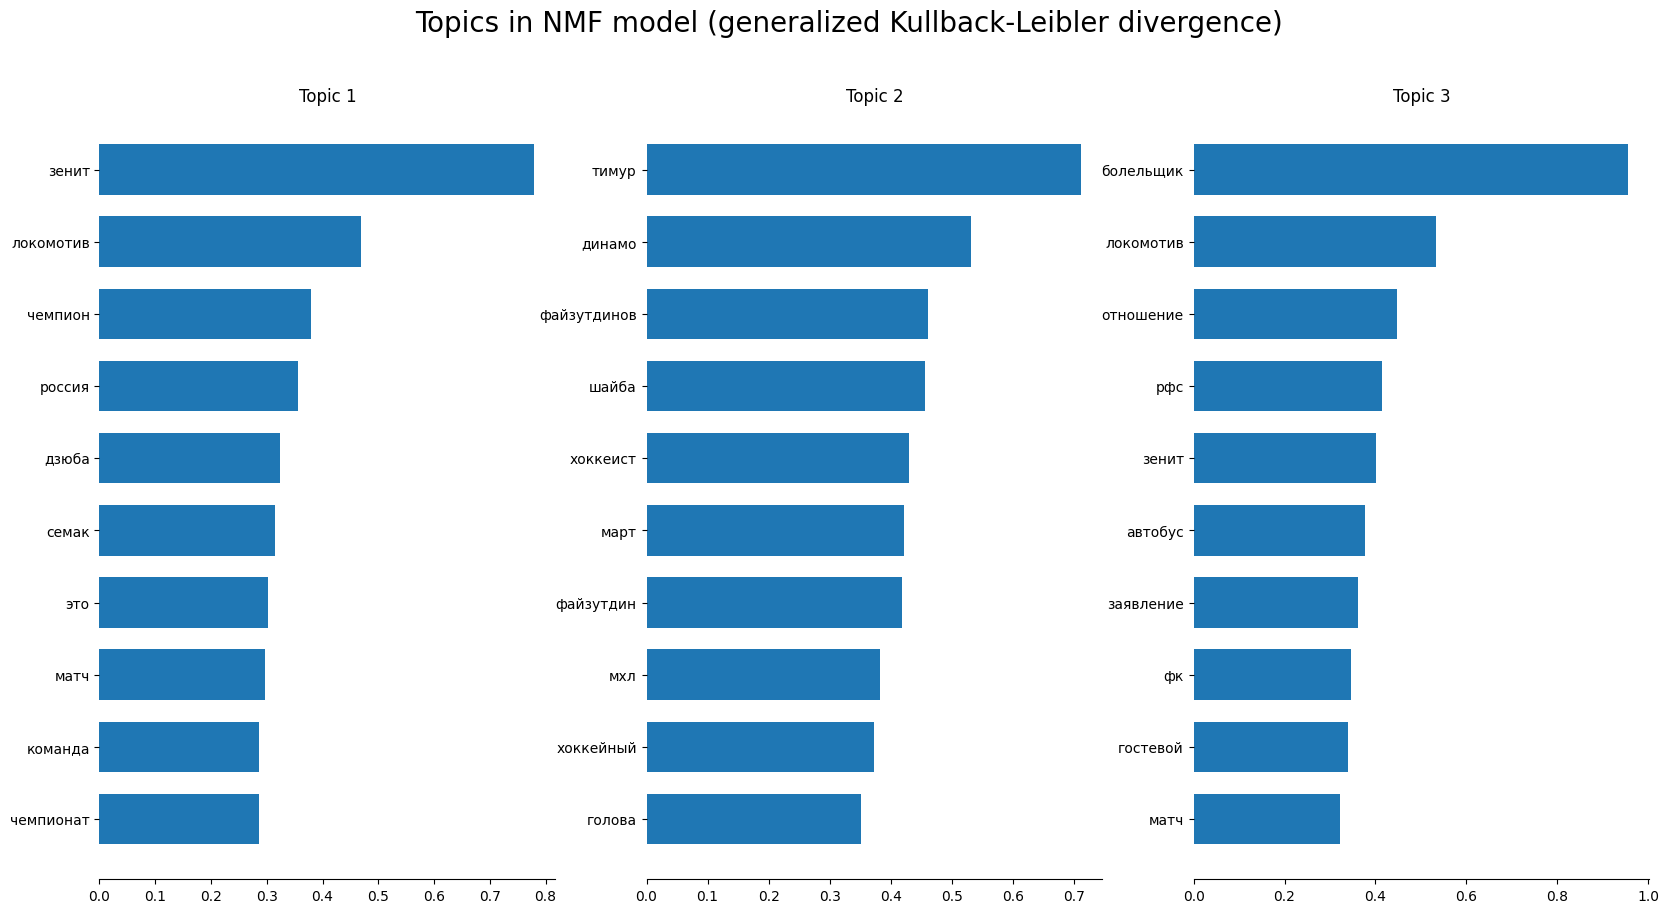

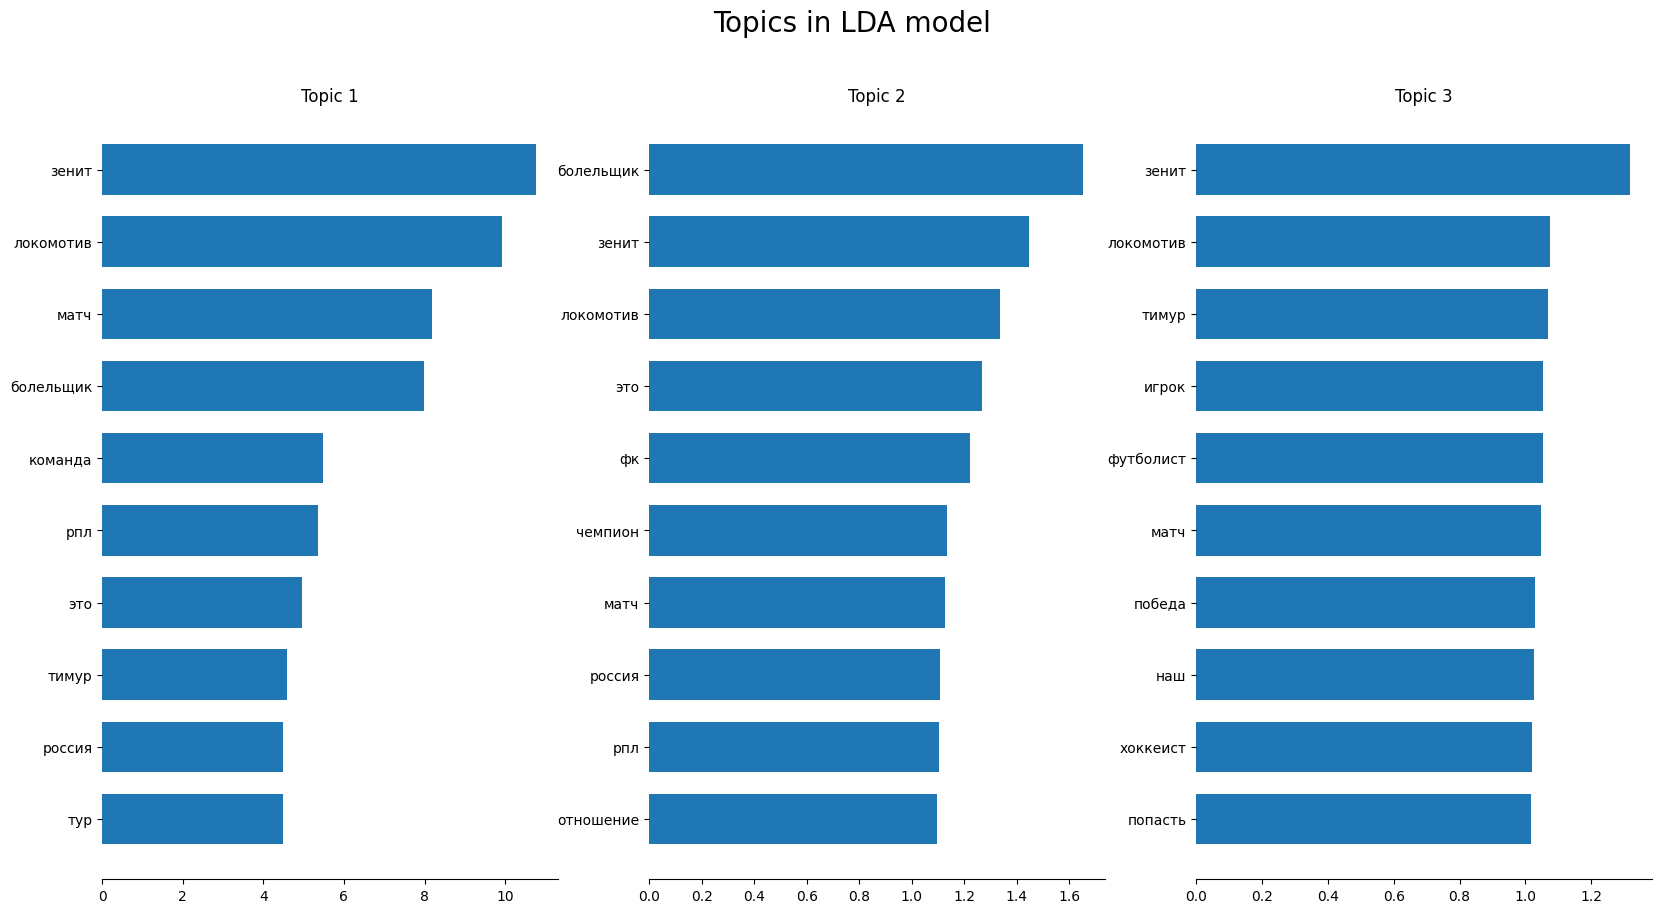

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

def plot_top_words(model, feature_names, n_top_words, title, columns):
    # Создаем сетку из двух строк и пяти столбцов
    fig, axes = plt.subplots(nrows=1, ncols=columns, figsize=(20, 10))
    # Преобразуем сетку в одномерный массив для удобства индексации
    axes = axes.flatten()
    
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx + 1}', fontdict={'fontsize': 12})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=10)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=20)

plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
plt.show()

n_features = 1000
n_components = 3
n_top_words = 10

countV = CountVectorizer(max_features=n_features)                                        
X_countV = countV.fit_transform(corpus)

tfidfV = TfidfVectorizer(max_features=n_features)                                        
X_tfidfV = tfidfV.fit_transform(corpus)

feature_names = tfidfV.get_feature_names_out() 

# Применяем модель NMF
nmf = NMF(n_components=n_components, random_state=1, l1_ratio=.5).fit(X_countV)
plot_top_words(
    nmf, feature_names, n_top_words, 
    'Topics in NMF model (Frobenius norm)', n_components
)

# Применяем модель NMF с другими параметрами
nmf_k = NMF(
    n_components=n_components, random_state=1,
    beta_loss='kullback-leibler', solver='mu', 
    max_iter=n_features, l1_ratio=.5
).fit(X_tfidfV)
plot_top_words(
    nmf_k, feature_names, n_top_words, 
    'Topics in NMF model (generalized Kullback-Leibler divergence)', n_components
)

# Применяем модель LDA
lda = LatentDirichletAllocation(n_components=n_components, max_iter=n_components,
                            learning_method='online',
                            learning_offset=50.,
                            random_state=0)
lda.fit(X_tfidfV)
plot_top_words(
    lda, feature_names, n_top_words, 
    'Topics in LDA model', n_components
)